In [12]:
import os 
from tqdm import tqdm
from PIL import Image
import numpy as np

def extract_features(image_dir, output_file):
    feats = []
    files = sorted(os.listdir(image_dir))
    for fname in tqdm(files[:1000]):  # limit to 1000 images for demo
        path = os.path.join(image_dir, fname)
        img = Image.open(path).convert('RGB')
        feats.append(img)
    feats = np.array(feats)
    np.save(output_file, feats)
    print(f"✅ Saved {feats.shape} to {output_file}")


for i in range(1, 11):
    real_dir = "cifake/train/REAL/cat_" + str(i).zfill(2) 
    fake_dir = "cifake/train/FAKE/cat_" + str(i).zfill(2) 
    # Extract and save
    extract_features(real_dir, "real_features_no_process" + str(i).zfill(2) + ".npy")
    extract_features(fake_dir, "fake_features_no_process" + str(i).zfill(2) + ".npy")




100%|██████████| 1000/1000 [00:00<00:00, 3365.32it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 4814.55it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 5426.51it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 5374.68it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 5653.46it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 5474.36it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 5419.17it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 5442.08it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 4941.28it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 5626.15it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 5501.62it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 5526.06it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 5606.72it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 5419.54it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 5529.21it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 5672.19it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 5038.98it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 5619.59it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 5399.12it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process10.npy


100%|██████████| 1000/1000 [00:00<00:00, 5620.61it/s]

✅ Saved (1000, 32, 32, 3) to fake_features_no_process10.npy


In [55]:
import numpy as np
import matplotlib.pyplot as plt

m = 10 # How many classes to load

real_feats_list = np.array([np.load("real_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)]) # Load in from files
fake_feats_list = np.array([np.load("fake_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)]) # Load in from files

real_list = np.array([[item.flatten() for item in cat] for cat in real_feats_list]) #  Flatten the data appropriately
fake_list = np.array([[item.flatten() for item in cat] for cat in fake_feats_list]) 

real_feats = np.concatenate(real_list) # Put all the data into a single two dimensional array, instead of a list of m arrays
fake_feats = np.concatenate(fake_list)

n = 100 # Sample from total list. If zero, use whole list.

if n > 0:
    np.random.shuffle(real_feats)
    np.random.shuffle(fake_feats)
    real_feats = real_feats[:n]
    fake_feats = fake_feats[:n]
print(real_feats.shape)

(100, 3072)


In [42]:
U_real, S_real, V_real = np.linalg.svd(real_feats, full_matrices=False) # Compute svd of real data
U_fake, S_fake, V_fake = np.linalg.svd(fake_feats, full_matrices=False) # Compute svd of AI data

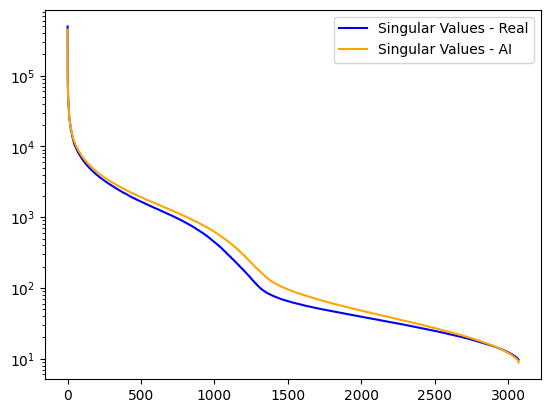

In [20]:
plt.plot(S_real, color='blue', label = "Singular Values - Real") # Plot
plt.plot(S_fake, color='orange', label = "Singular Values - AI")
plt.semilogy()
plt.legend()

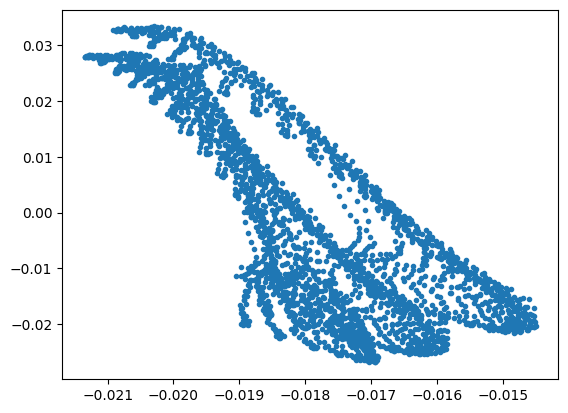

In [11]:
import matplotlib.pyplot as plt 


%matplotlib inline

x_real = (V_real)[0]
y_real = (V_real)[1]
z_real = V_real[2]
fig = plt.figure()
xyz = fig.add_subplot(111)
scatter1 = xyz.scatter(x_real, y_real, marker='.')


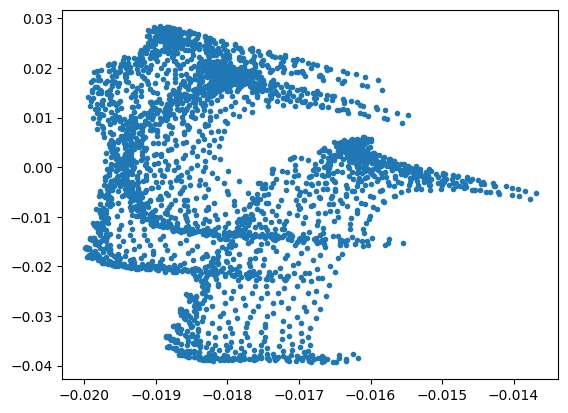

In [10]:

fig = plt.figure()
xyz = fig.add_subplot(111)
x_fake = V_fake[0]
y_fake = V_fake[1]
z_fake = V_fake[2]
scatter2 = xyz.scatter(x_fake, y_fake, marker='.')
plt.show()

In [17]:

real_dir = "cifake/test/REAL/" 
fake_dir = "cifake/test/FAKE/" 
# Extract and save
extract_features(real_dir, "real_features_test.npy")
extract_features(fake_dir, "fake_features_test.npy")

100%|██████████| 1000/1000 [00:00<00:00, 4097.10it/s]


✅ Saved (1000, 32, 32, 3) to real_features_test.npy


100%|██████████| 1000/1000 [00:00<00:00, 8329.35it/s]

✅ Saved (1000, 32, 32, 3) to fake_features_test.npy


In [18]:
from random import shuffle
real_test = np.load("real_features_test.npy")
fake_test = np.load("fake_features_test.npy")
real_test = np.array([item.flatten() for item in real_test]) #  Flatten the data appropriately
fake_test = np.array([item.flatten() for item in fake_test]) 
print(real_test.shape)
a = [real_test, fake_test]
shuffle(a)
U_1, S_1, V_1 = np.linalg.svd(real_test, full_matrices=False) # Compute svd of 1 data
U_2, S_2, V_2 = np.linalg.svd(fake_test, full_matrices=False) # Compute svd of AI data

(1000, 3072)


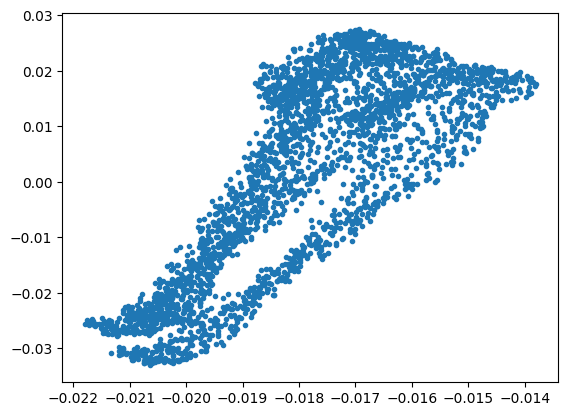

In [19]:
fig = plt.figure()
xyz = fig.add_subplot(111)
x = V_1[0]
y = V_1[1]
z = V_1[2]
scatter2 = xyz.scatter(x, y, marker='.')
plt.show()

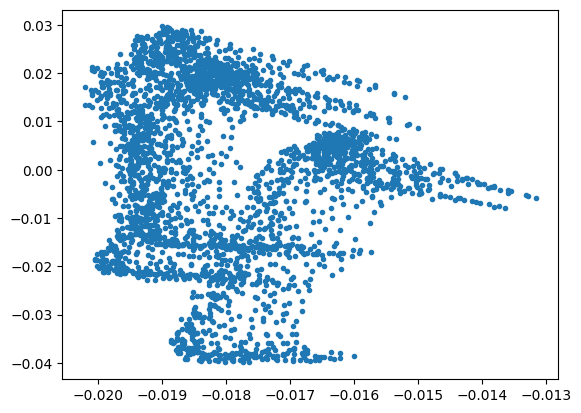

In [20]:

fig = plt.figure()
xyz = fig.add_subplot(111)
x = V_2[0]
y = V_2[1]
z = V_2[2]
scatter2 = xyz.scatter(x, y, marker='.')
plt.show()